In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### Carregamento do Dataframe e avaliação da estrutura

In [4]:
df = pd.read_csv('datasets/campeonato-brasileiro.csv')

In [5]:
df

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG
8401,8402,38,06/12/2023,21:32,Cuiaba,Athletico-PR,5-3-2,3-4-3,A. Cardoso de Oliveira,W. Carvalho,Cuiaba,Arena Pantanal,3,0,MT,PR
8402,8403,38,06/12/2023,21:32,Santos,Fortaleza,3-4-1-2,4-2-3-1,M. Fernandes,J. Vojvoda,Fortaleza,Estádio Urbano Caldeira,1,2,SP,CE
8403,8404,38,06/12/2023,21:32,Sao Paulo,Flamengo,4-2-3-1,4-2-3-1,D. Silvestre Júnior,A. Bacchi,Sao Paulo,Morumbi,1,0,SP,RJ


In [6]:
df.shape

(8405, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8405 non-null   int64 
 1   rodata              8405 non-null   int64 
 2   data                8405 non-null   object
 3   hora                8405 non-null   object
 4   mandante            8405 non-null   object
 5   visitante           8405 non-null   object
 6   formacao_mandante   3431 non-null   object
 7   formacao_visitante  3431 non-null   object
 8   tecnico_mandante    3795 non-null   object
 9   tecnico_visitante   3795 non-null   object
 10  vencedor            8405 non-null   object
 11  arena               8405 non-null   object
 12  mandante_Placar     8405 non-null   int64 
 13  visitante_Placar    8405 non-null   int64 
 14  mandante_Estado     8405 non-null   object
 15  visitante_Estado    8405 non-null   object
dtypes: int64(4), object(12)


In [8]:
df.count()

ID                    8405
rodata                8405
data                  8405
hora                  8405
mandante              8405
visitante             8405
formacao_mandante     3431
formacao_visitante    3431
tecnico_mandante      3795
tecnico_visitante     3795
vencedor              8405
arena                 8405
mandante_Placar       8405
visitante_Placar      8405
mandante_Estado       8405
visitante_Estado      8405
dtype: int64

In [10]:
df.isnull().sum()

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [81]:
#df[df.formacao_visitante.isnull()]

### Ajustes nos dados

In [11]:
# Empates
df[df.vencedor == '-']

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
6,7,1,30/03/2003,16:00,Juventude,Sao Paulo,NaN,NaN,NaN,NaN,-,Alfredo Jaconi,2,2,RS,SP
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,NaN,NaN,NaN,NaN,-,Castelão,0,0,CE,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,35,26/11/2023,18:32,Fortaleza,Palmeiras,4-4-2,3-4-1-2,J. Vojvoda,A. Moreira Ferreira,-,Arena Castelão,2,2,CE,SP
8380,8381,36,29/11/2023,21:30,Coritiba,Botafogo-RJ,4-1-4-1,3-4-3,G. Dalzotto Bossle,T. Retzalff Nunes,-,Couto Pereira,1,1,PR,RJ
8383,8384,36,30/11/2023,20:00,Cruzeiro,Athletico-PR,4-3-2-1,3-4-2-1,P. Autuori de Mello,W. Carvalho,-,Mineirão,1,1,MG,PR
8389,8390,37,03/12/2023,18:30,Botafogo-RJ,Cruzeiro,3-4-2-1,4-3-3,T. Retzalff Nunes,P. Autuori de Mello,-,Estádio Nilton Santos,0,0,RJ,MG


In [13]:
df.loc[df.vencedor == '-', 'vencedor'] = 'Empate'
# pode usar assim também: df['vencedor'].replace('-', 'Empate', inplace=True)

In [14]:
# Formato do campo Data
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df.sample(3)

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
2340,2341,2,2008-05-18,16:00,Athletico-PR,Sao Paulo,NaN,NaN,NaN,NaN,Empate,Kyocera Arena,1,1,PR,SP
1768,1771,21,2006-08-30,22:00,Juventude,Flamengo,NaN,NaN,NaN,NaN,Juventude,Alfredo Jaconi,1,0,RS,RJ
2444,2445,12,2008-07-17,20:30,Internacional,Atletico-MG,NaN,NaN,NaN,NaN,Internacional,Beira Rio,1,0,RS,MG


### Análise dos dados

1- Qual o time que mais venceu?

In [20]:
top_10 = df[df.vencedor != 'Empate']['vencedor'].value_counts()
top_10.head(10)

vencedor
Sao Paulo        365
Flamengo         354
Santos           340
Internacional    339
Palmeiras        329
Atletico-MG      327
Corinthians      326
Fluminense       322
Gremio           316
Athletico-PR     309
Name: count, dtype: int64

In [24]:
vencedores = df[df.vencedor != 'Empate']['vencedor'].value_counts()
top_10 = vencedores[0:10]

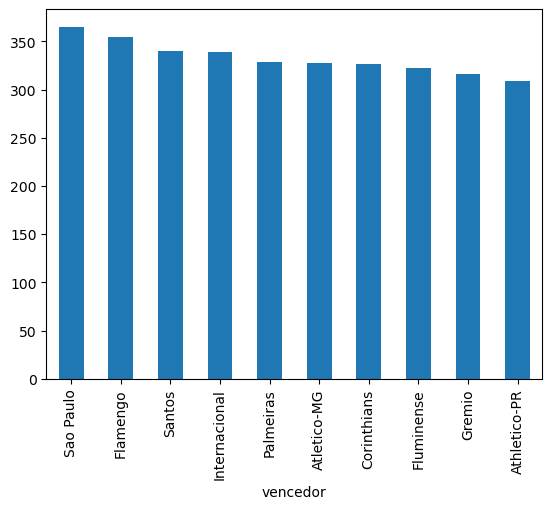

In [29]:
top_10.plot(kind='bar')
plt.show()